In [1]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers 
from tensorflow.keras import models 
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd

/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/sean/anaconda3/envs/tf-gpu-c

In [2]:
train_data = pd.read_csv('./train.csv')
test_data = pd.read_csv('./test.csv')
train_data_x , train_data_y  = train_data.iloc[:1000,:-1].copy(), train_data.iloc[:1000,-1].copy()
val_data_x , val_data_y = train_data.iloc[:1000,:-1].copy(), train_data.iloc[:1000,-1].copy()
test_data_x  = test_data



All numerical data can be easily normalized. 
for the non nunmerical entries, The number of unique entries should be considered. 

## Functions For Processing Input data 
Data is normalised either with some form of gaussian or between 0-1 depending on what it is

In [21]:
def atributes_to_int(series):
    unique_ent = pd.unique(series)
    num_unique_ent = len(unique_ent)
    for i in range(num_unique_ent):
        index = np.where(unique_ent[i] == series)
        series.iloc[index] = i
    return series/num_unique_ent ### I divided by the number of unique entries so that all the values in the input columns are between 0-1

def normalise(series):
    mean = np.mean(series)
    std = np.std(series)
    if std == 0:
        return (series - mean)
    else:
        return((series - mean)/std)

def column_processor(series):
    
    #series = series.fillna(0)
    if series.dtype == object:
        norm_series = atributes_to_int(series)
    if series.dtype == int or float:
        norm_series = normalise(series)
    return norm_series

def process_input_data(data):
    data = data.fillna(0)
    for i in range(len(data.iloc[0])):
        data.iloc[:,i] = column_processor(data.iloc[:,i])
    return data

In [22]:
train_data_x = process_input_data(train_data_x)
val_data_x = process_input_data(val_data_x)

/home/sean/anaconda3/envs/tf-gpu-cuda8/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [23]:
print(pd.unique(train_data_x['Alley']))
#print(train_data_x.columns)

[-0.24864765246815482 2.3686960577229486 4.986039767914052]


## Neural Net

In [ ]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(256,activation= 'relu',input_shape = (train_data_x.shape[1],)))
    model.add(layers.Dense(256,activation = 'relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = 'rmsprop',loss = 'mse', metrics = ['mae'])
    return model

In [ ]:
model = build_model()
history = model.fit(train_data_x,train_data_y, validation_data= (val_data_x,val_data_y),epochs = 500,batch_size = 200)

Train on 1000 samples, validate on 1000 samples
Epoch 1/5000
1000/1000 [==============================] - 0s 144us/sample - loss: 39666174361.6000 - mean_absolute_error: 182280.2344 - val_loss: 39663722496.0000 - val_mean_absolute_error: 182274.0781
Epoch 2/5000
1000/1000 [==============================] - 0s 12us/sample - loss: 39661899776.0000 - mean_absolute_error: 182269.7500 - val_loss: 39658816307.2000 - val_mean_absolute_error: 182262.6250
Epoch 3/5000
1000/1000 [==============================] - 0s 12us/sample - loss: 39656443084.8000 - mean_absolute_error: 182257.3281 - val_loss: 39652466688.0000 - val_mean_absolute_error: 182248.5312
Epoch 4/5000
1000/1000 [==============================] - 0s 10us/sample - loss: 39649518387.2000 - mean_absolute_error: 182242.0625 - val_loss: 39644559769.6000 - val_mean_absolute_error: 182231.5156
Epoch 5/5000
1000/1000 [==============================] - 0s 10us/sample - loss: 39640857804.8000 - mean_absolute_error: 182223.6250 - val_loss: 39

In [ ]:
mae = history.history['val_mean_absolute_error']
epochs = range(1,5001)


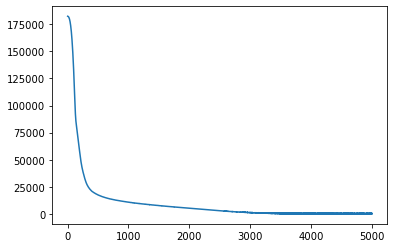

In [ ]:
plt.plot(epochs,mae)


Clearly the learning rate is wayy to slow, this isnt surprising because the activation on the last neuron has to be pretty big, to get this to work.  \

I want to now have a play around with this to see if we can get the training to go a bit faster, before tackling the accuracy. \

As an aside I think looking at the winning networks on Kaggle might be really informative 
